*** 
# Heart Disease Predictor
###### By Jonathan Molina Rivera
***
We predict the possibility that a pacient will develop heart disease using real hospital data.

Using three main algorithims:
1. `KNeighborsClassifier`
2. `DecisionTreeClassifier`
3. `RandomForestClassifier`

Dataset from: https://www.kaggle.com/ronitf/heart-disease-uci

## Load Libraries
We load libraries used in this notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#setup
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset
We load the patient info using the function `pd.read_csv()`, and use `pd.info()` to display important information about all the columns of `'pd'`. THis method allows us to view the number, dtype and the uniformity of data in the columns of our dataframe.

In [3]:
df = pd.read_csv('dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Knowing what kind of data we are working with we use `df.describe()` to view the total number, mean, std, min, max of all columns of `df`. 
<br> Columns code legend (taken from dataset webpage):
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- restecg: resting ecg
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection 

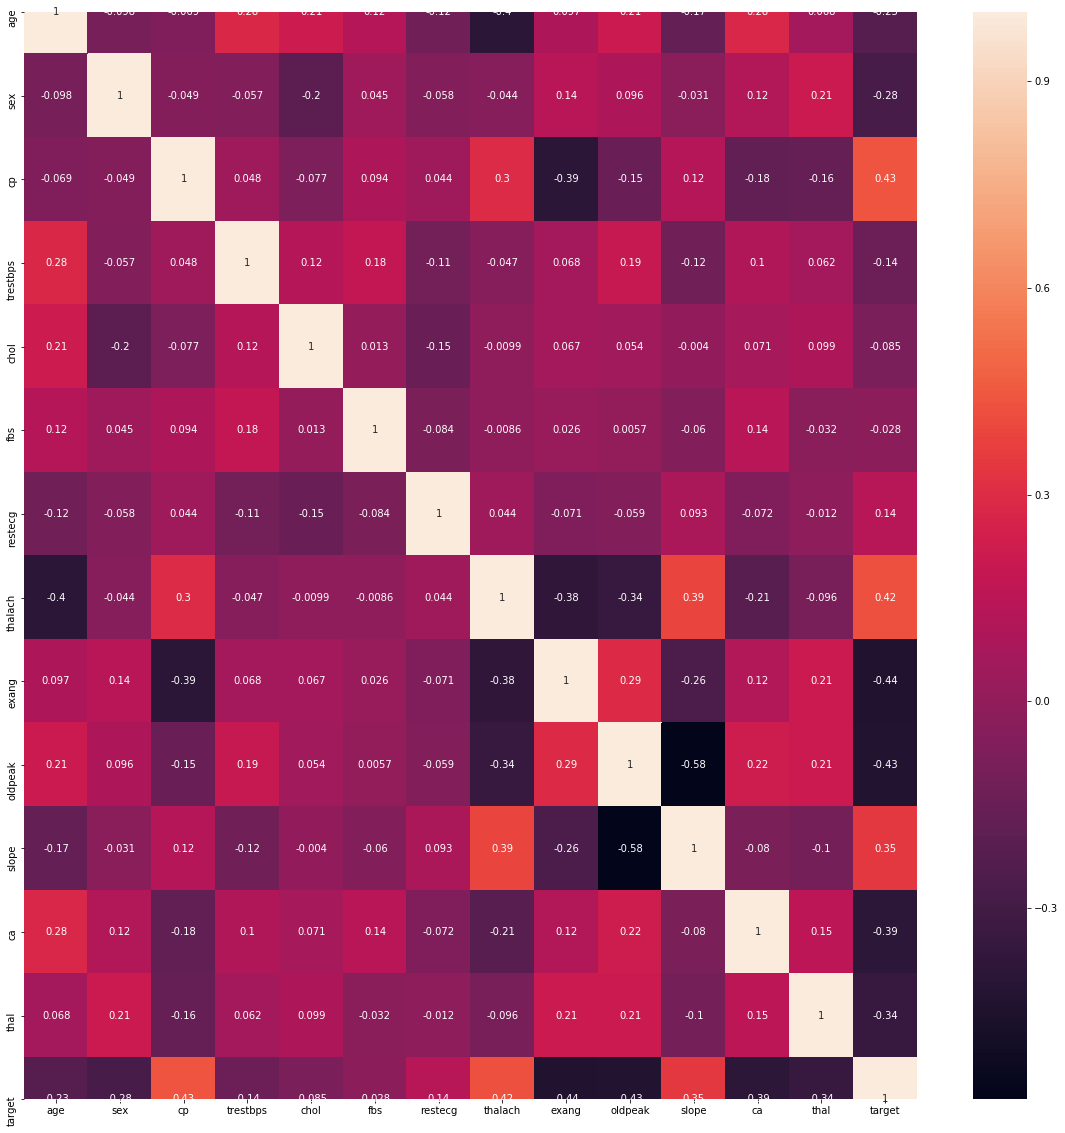

In [5]:
import seaborn as sns
#Getting correlations of each features in the dataset.
corrmat = df.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="rocket")

###### **Figure 1.** We use correlation to see what variables are positively and negatively correlated. This helps us adequately select features. 

### Histogram

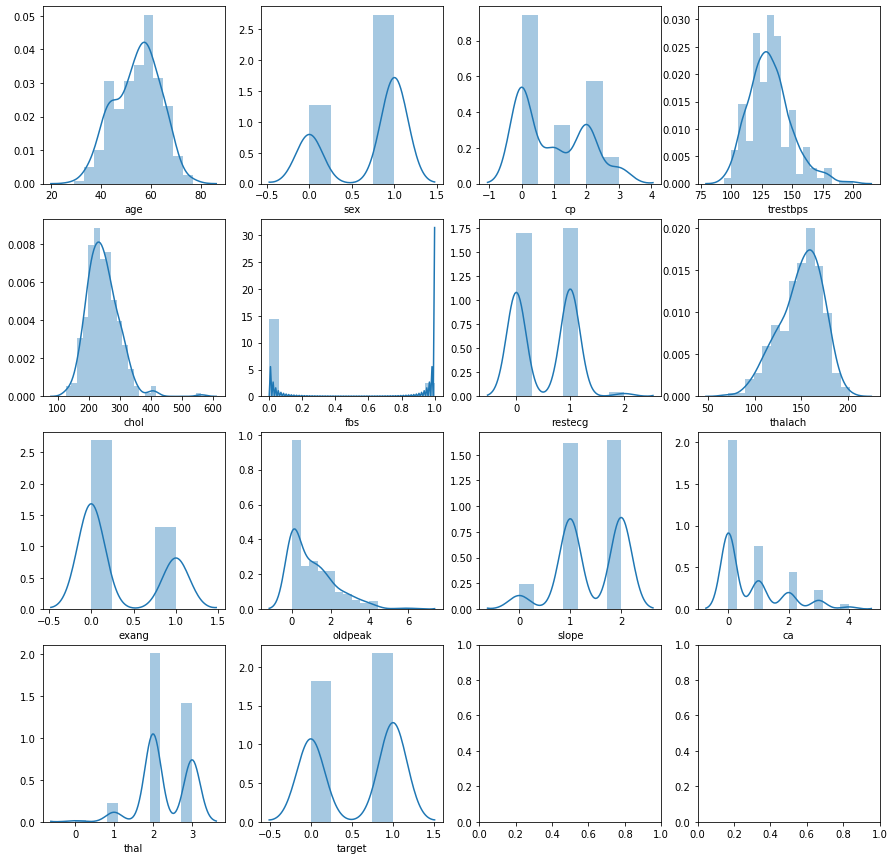

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//4,i%4])

###### **Figure 2.** Histograms of the data for all columns of dataset.

It' considered good practice to work with a dataset where the target classes are of approximately equal size. Typically, a minimum 60:40 margin is acceptable.

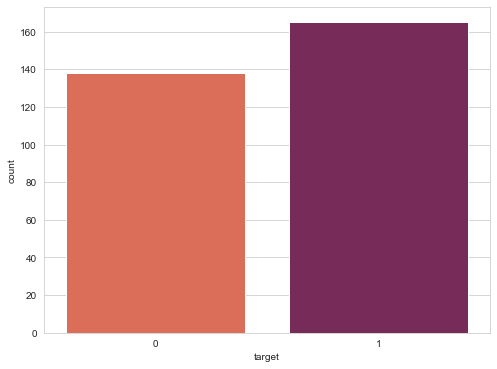

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
sns.countplot(x='target',data=df,palette='rocket_r')

###### **Figure 3.** Barchart  of the target class. If someone **has** heart disease **(1)** and those who **don't** have heart disease **(0)**.

### Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [8]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

#####  Code Explanation
We get the dummy values of the columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']) because they are categorical and there isn't much variability within them. We used standard scalar because the columns ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] have significant variability and are measured in very different units.  This will help us to rescale/scale down the values using a standard normal distruibution

In [10]:
dataset.head() #print dataframe

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


We print our new data set with the dummy variables and the standardScaler values.

## Models

### Creating dependant and independant features.

In [11]:
y = dataset['target'] #dep
X = dataset.drop(['target'], axis = 1) #ind

### KNeighbors Classifier

In [12]:
from sklearn.model_selection import cross_val_score #we use to apply cross valorations
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

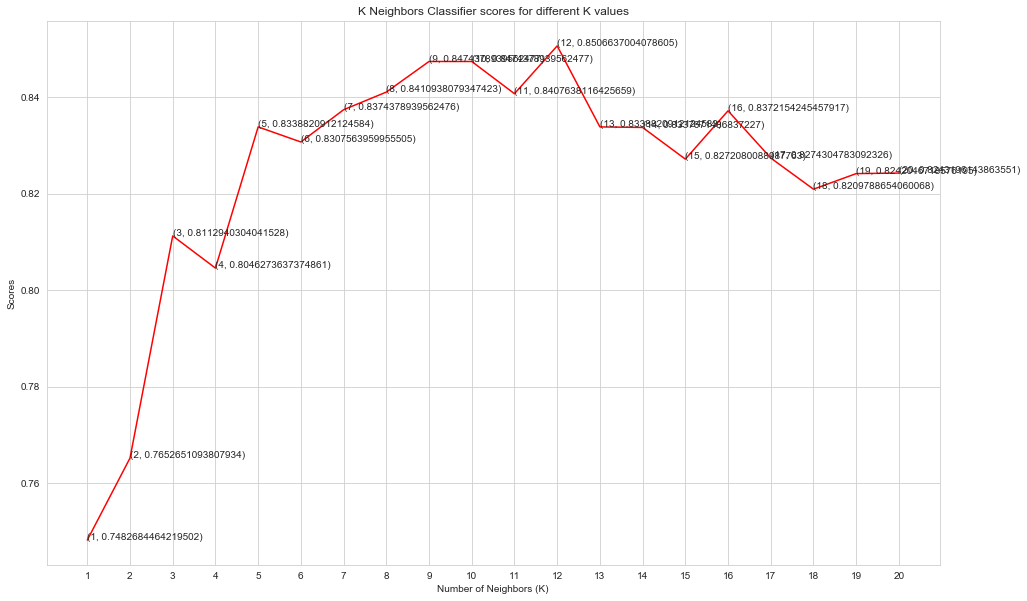

In [13]:
plt.figure(figsize=(16,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

###### **Figure 4.** Line Graph of models.

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8506637004078605

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [17]:
score.mean()

0.8277678902484242